<a href="https://colab.research.google.com/github/iesous-kurios/famprom/blob/master/FP_Exit_Destination_Model_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io 

# Upload Original Dataframe

In [2]:
uploaded = files.upload()

In [3]:
df = pd.read_excel("All_data_with_exits.xlsx")
print(df.shape)
df.head()

(1862, 143)


,2.1 Organization Name,2.2 Project Name,2.4 ProjectType,2.5 Utilization Tracking Method (Invalid),2.6 Federal Grant Programs,5.8 Personal ID,5.9 Household ID,3.15 Relationship to HoH,3.16 Client Location,CaseMembers,3.10 Enroll Date,3.11 Exit Date,3.12 Exit Destination,3.2 Social Security Quality,3.3 Birthdate Quality,Age at Enrollment,Current Age,3.4 Race,3.5 Ethnicity,3.6 Gender,3.7 Veteran Status,3.8 Disabling Condition at Entry,3.917 Living Situation,3.917b Stayed Less Than 7 Nights,3.917 Stayed Less Than 90 Days,"3.917b Stayed in Streets, ES or SH Night Before",3.917 Length of Stay,3.917 Homeless Start Date,Length of Time Homeless (3.917 Approximate Start),3.917 Times Homeless Last 3 Years,3.917 Total Months Homeless Last 3 Years,V5 Last Permanent Address,V5 State,V5 Zip,Municipality (City or County),Days Enrolled in Project,RRH In Permanent Housing,RRH Date Of Move-In,Days Enrolled Until RRH Date of Move-in,4.1 Housing Status,...,4.09 Mental Health Problem,4.05 Physical Disability,CaseChildren,CaseAdults,Bed Nights During Report Period,Count of Bed Nights - Entire Episode,HEN-HP Referral Most Recent,HEN-RRH Referral Most Recent,WorkSource Referral Most Recent,YAHP Referral Most Recent,4.04.10 Other Public,4.04.10 State Funded,4.04.11 Indian Health Services (IHS),4.04.12 Other,4.04.3 Combined Childrens HealthInsurance/Medicaid,4.04.3 Medicaid,4.04.4 Medicare,4.04.5 State Children's health Insurance S-CHIP,4.04.6 Veteran's Administration Medical Services,4.04.8 Health Insurance obtained through COBRA,4.04.7 Private - Employer,4.04.9 Private,4.04.9 Private - Individual,4.2.3a Earned Income,4.2.4b Unemployment Insurance,4.2.5c Supplemental Security Income,4.2.6d Social Security Disability Income,4.2.7e VA Disability Compensation,4.2.8f VA Disability Pension,4.2.9g Private Disability Income,4.2.10h Workers Compensation,4.2.11i TANF,4.2.12j General Assistance,4.2.13k Retirement (Social Security),4.2.14l Pension from a Former Job,4.2.15m Child Support,4.2.16n Alimony,4.2.17o Other Income,Chronic Homeless Status_vHMISDatAssessment,Chronic Homeless Status_EvaluatevHMIS&HMISDA
0,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,56550,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Client Refused,Full DOB Reported,4,7,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36138,92775,Self,Spokane City & County CoC,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,28,31,White,Non-Hispanic/Latino,Male,No,Missing,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,"One month or more, but less than 90 days",2014-11-01,1164.0,Three times,More than 12 months,Data not collected,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1300.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
2,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36139,92775,Daughter,NaN,6,2017-09-10,2018-01-24,No exit interview completed,Client Refused,Full DOB Reported,10,13,White,Non-Hispanic/Latino,Female,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
3,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36140,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,5,8,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN

In [4]:
df = df.rename(columns={'2.1 Organization Name':'org_name',
                        '2.2 Project Name':'project_name',
                        '2.4 ProjectType':'project_type',
                        '2.5 Utilization Tracking Method (Invalid)':'util_track_method',
                        '2.6 Federal Grant Programs':'fed_grant_programs',
                        'Enrollment Created By':'enrollment_created_by',
                        '3.1 FirstName':'first_name','3.1 LastName':'last_name',
                        '5.8 Personal ID':'personal_id','5.9 Household ID':'case_id',
                        '3.15 Relationship to HoH':'relationship_to_HoH',
                        '3.16 Client Location':'client_location','CaseMembers':'case_members',
                        '3.10 Enroll Date':'enroll_date','3.11 Exit Date':'exit_date',
                        '3.12 Exit Destination':'exit_destination','3.2 SocSecNo':'ssn',
                        '3.2 Social Security Quality':'ssn_quality','3.3 Birthdate':'dob',
                        '3.3 Birthdate Quality':'dob_quality','Age at Enrollment':'age_at_enrollment',
                        'Current Age':'current_age','3.4 Race':'race','3.5 Ethnicity':'ethnicity',
                        '3.6 Gender':'gender','3.7 Veteran Status':'vet_status',
                        '3.8 Disabling Condition at Entry':'disabling_cond_at_entry',
                        '3.917 Living Situation':'living_situation',
                        '3.917b Stayed Less Than 7 Nights':'stayed_7_or_less',
                        '3.917 Stayed Less Than 90 Days':'stayed_90_or_less',
                        '3.917b Stayed in Streets, ES or SH Night Before':'stayed_street_ES_or_SH_night_before',
                        '3.917 Length of Stay':'length_of_stay',
                        '3.917 Homeless Start Date':'homeless_start_date',
                        'Length of Time Homeless (3.917 Approximate Start)':'length_of_time_homeless',
                        '3.917 Times Homeless Last 3 Years':'times_homeless_last_3years',
                        '3.917 Total Months Homeless Last 3 Years':'total_months_homeless',
                        'V5 Last Permanent Address':'last_perm_address',
                        'V5 Prior Address':'prior_address','V5 State':'state',
                        'V5 Zip':'zip','Municipality (City or County)':'municipality',
                        'Days Enrolled in Project':'days_enrolled_in_project',
                        'RRH In Permanent Housing':'rrh_in_perm_housing',
                        'RRH Date Of Move-In':'rrh_date_of_move-in',
                        'Days Enrolled Until RRH Date of Move-in':'days_enrolled_until_rrh_movein',
                        '4.1 Housing Status':'housing_status',
                        '4.4 Covered by Health Insurance':'covered_by_health_insurance',
                        '4.11 Domestic Violence':'domestic_violence',
                        '4.11 Domestic Violence - Currently Fleeing DV?':'currently_fleeing',
                        '4.11 Domestic Violence - When it Occurred':'when_dv_occured',
                        '4.13 Engagement Date':'engagement_date',
                        'Days Enrolled Until Engagement Date':'days_enrolled_until_engaged',
                        '4.24 Current Status (Retired Data Element)':'current_status',
                        '4.24 In School (Retired Data Element)':'in_school',
                        '4.24 Connected to McKinney Vento Liason (Retired)':'connected_to_MVento',
                        'Household Type':'household_type',
                        'Latitude':'latitude','Longitude':'longitude',
                        'R1 Referral Source':'referal_source',
                        'R2 Date Status Determined':'date_status_determined',
                        'R2 Enroll Status':'enroll_status',
                        'R2 Runaway Youth':'runaway_youth',
                        'R2 Reason Why No Services Funded':'reason_why_no_services_funded',
                        'R3 Sexual Orientation':'sexual_orientation',
                        'R4 Last Grade Completed':'last_grade_completed',
                        'R5 School Status':'school_status',
                        'R6 Employed Status':'employed_status',
                        'R6 Why Not Employed':'reason_not_employed',
                        'R6 Type of Employment':'type_of_employment',
                        'R6 Looking for Work':'looking_for_work',
                        'R7 General Health Status':'general_health_status',
                        'R8 Dental Health Status':'dental_health_status',
                        'R9 Mental Health Status':'mental_health_status',
                        'R10 Pregnancy Status':'pregnancy_status',
                        'R10 Pregnancy Due Date':'pregnancy_due_date',
                        'Client Record Restricted':'client_record_restricted',
                        'InfoReleaseNo':'infoReleaseNo',
                        'Information Release Status':'info_release_status',
                        '4.12 Contact Services':'contact_services',
                        'Date of Last Contact (Beta)':'date_of_last_contact',
                        'Date of First Contact (Beta)':'date_of_first_contact',
                        'Count of Bed Nights (Housing Check-ins)':'housing_checkins',
                        'Date of Last ES Stay (Beta)':'date_of_last_stay',
                        'Date of First ES Stay (Beta)':'date_of_first_stay',
                        '4.2 Income Total at Entry':'income_at_entry',
                        '4.02 Total Income at Annual Update':'income_at_update',
                        '4.2 Income Total at Exit':'income_at_exit',
                        '4.3 Non-Cash Benefit Count':'non-cash_benefit_count',
                        '4.3 Non-Cash Benefit Count at Exit':'non-cash_count_at_exit',
                        'CurrentDate':'current_date',
                        'Barrier Count at Entry':'barrier_count_at_entry',
                        'Chronic Homeless Status':'chronic_homeless_status',
                        'ProgramType':'program_type',
                        'SOAR Eligibility Determination (Most Recent)':'soar_eligibility',
                        'SOAR Enrollment Determination (Most Recent)':'soar_enrollment',
                        'RRH | Most Recent Enrollment':'most_recent_rrh',
                        'Street Outreach | Most Recent Enrollment':'most_recent_street_outreach',
                        'Coordinated Entry | Most Recent Enrollment':'most_recent_CE',
                        'Emergency Shelter | Most Recent Enrollment':'most_recent_ES',
                        'Transitional Housing | Most Recent Enrollment':'most_recent_trans',
                        'PSH | Most Recent Enrollment':'most_recent_PSH',
                        'Prevention | Most Recent Enrollment':'most_recent_prevention',
                        'Under 25 Years Old':'under_25',
                        'ClientID':'client_id',
                        '4.10 Alcohol Abuse (Substance Abuse)':'alcohol_abuse',
                        '4.07 Chronic Health Condition':'chronic_health_condition',
                        '4.06 Developmental Disability':'developmental_disability',
                        '4.10 Drug Abuse (Substance Abuse)':'substance_abuse',
                        '4.08 HIV/AIDS':'HIV_AIDS',
                        '4.09 Mental Health Problem':'mental_health_problem',
                        '4.05 Physical Disability':'physical_disability',
                        'CaseChildren':'case_children','CaseAdults':'case_adults',
                        'Bed Nights During Report Period':'bednights_during_report_period',
                        'Count of Bed Nights - Entire Episode':'entire_episode_bednights',
                        'HEN-HP Referral Most Recent':'most_recent_HEN-HP',
                        'HEN-RRH Referral Most Recent':'most_recent_HEN-RRH',
                        'WorkSource Referral Most Recent':'most_recent_worksource',
                        'YAHP Referral Most Recent':'most_recent_YAHP',
                        '4.04.10 Other Public':'other_public',
                        '4.04.10 State Funded':'state_funded',
                        '4.04.11 Indian Health Services (IHS)':'indian_health_services',
                        '4.04.12 Other':'other',
                        '4.04.3 Combined Childrens HealthInsurance/Medicaid':'combined_childrens_health_insurance',
                        '4.04.3 Medicaid':'medicaid','4.04.4 Medicare':'medicare',
                        "4.04.5 State Children's health Insurance S-CHIP":'CHIP',
                        "4.04.6 Veteran's Administration Medical Services":'VAMS',
                        '4.04.8 Health Insurance obtained through COBRA':'COBRA',
                        '4.04.7 Private - Employer':'Private_employer',
                        '4.04.9 Private':'private','4.04.9 Private - Individual':'private_individual',
                        '4.2.3a Earned Income':'earned_income',
                        '4.2.4b Unemployment Insurance':'unemployement_income',
                        '4.2.5c Supplemental Security Income':'supplemental_security_income',
                        '4.2.6d Social Security Disability  Income':'social_security_disability_income',
                        '4.2.7e VA Disability Compensation':'VA_disability_compensation',
                        '4.2.8f VA Disability Pension':'VA_disability_pension',
                        '4.2.9g Private Disability Income':'private_disability_income',
                        '4.2.10h Workers Compensation':'workers_compensation',
                        '4.2.11i TANF':'TANF','4.2.12j General Assistance':'general_assistance',
                        '4.2.13k Retirement (Social Security)':'retirement_social_security',
                        '4.2.14l Pension from a Former Job':'pension_from_former_job',
                        '4.2.15m Child Support':'child_support',
                        '4.2.16n Alimony':'alimony',
                        '4.2.17o Other Income':'other_income',
                        'Chronic Homeless Status_vHMISDatAssessment':'chronic_homeless_status_assessment',
                        'Chronic Homeless Status_EvaluatevHMIS&HMISDA':'chronic_homeless_status_evaluation',
                        'Email':'email','HomePhone':'home_phone','WorkPhone':'work_phone'})

df.head()

,org_name,project_name,project_type,util_track_method,fed_grant_programs,personal_id,case_id,relationship_to_HoH,client_location,case_members,enroll_date,exit_date,exit_destination,ssn_quality,dob_quality,age_at_enrollment,current_age,race,ethnicity,gender,vet_status,disabling_cond_at_entry,living_situation,stayed_7_or_less,stayed_90_or_less,stayed_street_ES_or_SH_night_before,length_of_stay,homeless_start_date,length_of_time_homeless,times_homeless_last_3years,total_months_homeless,last_perm_address,state,zip,municipality,days_enrolled_in_project,rrh_in_perm_housing,rrh_date_of_move-in,days_enrolled_until_rrh_movein,housing_status,...,mental_health_problem,physical_disability,case_children,case_adults,bednights_during_report_period,entire_episode_bednights,most_recent_HEN-HP,most_recent_HEN-RRH,most_recent_worksource,most_recent_YAHP,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,CHIP,VAMS,COBRA,Private_employer,private,private_individual,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,VA_disability_compensation,VA_disability_pension,private_disability_income,workers_compensation,TANF,general_assistance,retirement_social_security,pension_from_former_job,child_support,alimony,other_income,chronic_homeless_status_assessment,chronic_homeless_status_evaluation
0,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,56550,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Client Refused,Full DOB Reported,4,7,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36138,92775,Self,Spokane City & County CoC,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,28,31,White,Non-Hispanic/Latino,Male,No,Missing,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,"One month or more, but less than 90 days",2014-11-01,1164.0,Three times,More than 12 months,Data not collected,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1300.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
2,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36139,92775,Daughter,NaN,6,2017-09-10,2018-01-24,No exit interview completed,Client Refused,Full DOB Reported,10,13,White,Non-Hispanic/Latino,Female,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
3,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36140,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,5,8,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36141,92775,Significant Other (Non-Married),NaN,6,2017-09-10,2018-01-08,No exit interview completed,Client Refused,Full DOB Reported,27,30,White,Non-Hispanic/Latino,Female,No,Yes,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,Data not collected,2016-09-05,490.0,NaN,More than 12 months,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,Mental Illness,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1200.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,1


In [5]:
# Convert all column names to lowercase for ease of use using map
df.columns = map(str.lower, df.columns)
df.head()

,org_name,project_name,project_type,util_track_method,fed_grant_programs,personal_id,case_id,relationship_to_hoh,client_location,case_members,enroll_date,exit_date,exit_destination,ssn_quality,dob_quality,age_at_enrollment,current_age,race,ethnicity,gender,vet_status,disabling_cond_at_entry,living_situation,stayed_7_or_less,stayed_90_or_less,stayed_street_es_or_sh_night_before,length_of_stay,homeless_start_date,length_of_time_homeless,times_homeless_last_3years,total_months_homeless,last_perm_address,state,zip,municipality,days_enrolled_in_project,rrh_in_perm_housing,rrh_date_of_move-in,days_enrolled_until_rrh_movein,housing_status,...,mental_health_problem,physical_disability,case_children,case_adults,bednights_during_report_period,entire_episode_bednights,most_recent_hen-hp,most_recent_hen-rrh,most_recent_worksource,most_recent_yahp,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,chip,vams,cobra,private_employer,private,private_individual,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,va_disability_compensation,va_disability_pension,private_disability_income,workers_compensation,tanf,general_assistance,retirement_social_security,pension_from_former_job,child_support,alimony,other_income,chronic_homeless_status_assessment,chronic_homeless_status_evaluation
0,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,56550,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Client Refused,Full DOB Reported,4,7,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36138,92775,Self,Spokane City & County CoC,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,28,31,White,Non-Hispanic/Latino,Male,No,Missing,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,"One month or more, but less than 90 days",2014-11-01,1164.0,Three times,More than 12 months,Data not collected,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1300.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
2,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36139,92775,Daughter,NaN,6,2017-09-10,2018-01-24,No exit interview completed,Client Refused,Full DOB Reported,10,13,White,Non-Hispanic/Latino,Female,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,NaN,NaN,No Move-In Date,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
3,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36140,92775,Son,NaN,6,2017-09-10,2018-01-08,No exit interview completed,Full SSN,Full DOB Reported,5,8,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,36141,92775,Significant Other (Non-Married),NaN,6,2017-09-10,2018-01-08,No exit interview completed,Client Refused,Full DOB Reported,27,30,White,Non-Hispanic/Latino,Female,No,Yes,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,Data not collected,2016-09-05,490.0,NaN,More than 12 months,NaN,NaN,NaN,NaN,120,NaN,NaN,No Move-In Date,Category 1 - Homeless,...,Mental Illness,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1200.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,1


In [6]:
df.to_csv('All_data_with_exits.csv')
files.download('All_data_with_exits.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Explore & Clean Data

## Numerical Exploration

In [7]:
df.describe()

,personal_id,case_id,case_members,age_at_enrollment,current_age,stayed_7_or_less,stayed_90_or_less,stayed_street_es_or_sh_night_before,length_of_time_homeless,zip,days_enrolled_in_project,rrh_in_perm_housing,rrh_date_of_move-in,in_school,latitude,longitude,referal_source,date_status_determined,enroll_status,runaway_youth,reason_why_no_services_funded,sexual_orientation,general_health_status,dental_health_status,mental_health_status,pregnancy_status,pregnancy_due_date,inforeleaseno,contact_services,housing_checkins,income_at_entry,income_at_update,income_at_exit,non-cash_benefit_count,non-cash_count_at_exit,barrier_count_at_entry,chronic_homeless_status,program_type,soar_enrollment,client_id,case_children,case_adults,bednights_during_report_period,entire_episode_bednights,most_recent_hen-hp,most_recent_hen-rrh,most_recent_worksource,most_recent_yahp,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,va_disability_compensation,va_disability_pension,private_disability_income,workers_compensation,tanf,general_assistance,retirement_social_security,pension_from_former_job,child_support,alimony,other_income,chronic_homeless_status_assessment,chronic_homeless_status_evaluation
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,0.0,0.0,0.0,906.000000,521.000000,1862.000000,0.0,0.0,0.0,72.000000,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1854.000000,1862.000000,1862.000000,376.000000,3.000000,430.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.0,0.0,1862.0,1862.000000,1862.000000,1755.000000,1755.000000,0.0,0.0,0.0,0.0,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.0,1862.000000,1862.000000,1862.00000,1862.000000,1862.0,1862.0,1862.000000,1862.0,1862.000000,1862.000000,1862.000000
mean,79080.234694,111716.666488,3.720730,19.899033,21.442535,NaN,NaN,NaN,215.546358,92862.009597,47.462943,NaN,NaN,NaN,47.678138,-117.393425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.648328,2.909774,29.372718,854.225399,464.333333,885.635860,0.312030,0.348013,0.495704,0.035446,1.0,NaN,1.0,2.055317,1.665414,28.835328,31.163533,NaN,NaN,NaN,NaN,68.206477,2.957573,28.965677,17.393126,2.852309,0.0,0.105800,0.784103,42.43609,0.706767,0.0,0.0,3.670354,0.0,4.418367,0.038131,0.038131
std,19157.736692,10969.031505,1.478264,15.551979,15.589497,NaN,NaN,NaN,414.637370,15476.113160,52.785286,NaN,NaN,NaN,0.060348,0.078696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.962052,7.585544,42.000354,614.322920,463.034916,634.800232,0.553291,0.549773,0.948843,0.184953,0.0,NaN,0.0,1.360236,0.540937,39.417418,42.612224,NaN,NaN,NaN,NaN,338.315250,59.163385,196.573051,119.018637,71.869981,0.0,4.565374,33.834754,147.10562,23.665748,0.0,0.0,42.600982,0.0,62.073699,0.191564,0.191564
min,11506.000000,88364.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,-201.000000,12866.000000,0.000000,NaN,NaN,NaN,47.501607,-117.736829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.000000,0.000000,0.000000,0.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,74024.250000,102697.750000,3.000000,6.000000,7.000000,NaN,NaN,NaN,35.000000,98841.000000,8.000000,NaN,NaN,NaN,47.656305,-117.431116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,0.000000,2.000000,459.000000,197.000000,459.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,1.0,1.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,84869.500000,109777.500000,3.000000,17.000000,18.000000,NaN,NaN,NaN,90.000000,99201.000000,30.000000,NaN,NaN,NaN,47.665700,-117.393543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,1.000000,10.000000,700.000000,197.000000,706.500000,0.000000,0.000000,0.000000,0.00

In [8]:
df.describe(exclude="number")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,org_name,project_name,project_type,util_track_method,fed_grant_programs,relationship_to_hoh,client_location,enroll_date,exit_date,exit_destination,ssn_quality,dob_quality,race,ethnicity,gender,vet_status,disabling_cond_at_entry,living_situation,length_of_stay,homeless_start_date,times_homeless_last_3years,total_months_homeless,last_perm_address,state,municipality,days_enrolled_until_rrh_movein,housing_status,covered_by_health_insurance,domestic_violence,currently_fleeing,when_dv_occured,engagement_date,days_enrolled_until_engaged,current_status,connected_to_mvento,household_type,last_grade_completed,school_status,employed_status,reason_not_employed,type_of_employment,looking_for_work,client_record_restricted,info_release_status,date_of_last_contact,date_of_first_contact,date_of_last_stay,date_of_first_stay,current_date,soar_eligibility,most_recent_rrh,most_recent_street_outreach,most_recent_ce,most_recent_es,most_recent_trans,most_recent_psh,most_recent_prevention,under_25,alcohol_abuse,chronic_health_condition,developmental_disability,substance_abuse,hiv_aids,mental_health_problem,physical_disability,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,chip,vams,cobra,private_employer,private,private_individual
count,1862,1862,1862,1862,1755,1862,566,1862,1796,1796,1862,1862,1859,1859,1862,954,1862,906,906,906,902,906,670,521,50,1862,906,1755,717,107,107,482,1862,402,207,1862,367,256,380,362,19,1,1862,1862,1277,1277,1639,1639,1862,19,1051,76,1538,1862,181,33,71,1862,41,206,150,72,1,307,146,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616
unique,1,2,1,2,1,10,1,431,412,21,5,2,9,5,4,3,6,15,9,412,7,16,5,23,5,1,6,5,3,2,6,215,35,4,5,3,11,8,2,3,3,1,2,2,369,295,410,418,1,12,295,56,421,582,69,14,29,2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,2,2,1
top,Family Promise of Spokane,FPS--ES--Open Doors,Emergency shelter,Night-by-Night (nbn),NAA,Self,Spokane City & County CoC,2018-08-08 00:00:00,2019-03-06 00:00:00,"Emergency shelter, including hotel or motel pa...",Full SSN,Full DOB Reported,White,Non-Hispanic/Latino,Female,No,No,Place not meant for habitation,Two to six nights,2019-07-01 00:00:00,One time,More than 12 months,Full address reported,WA,Spokane,No Move-In Date,Category 1 - Homeless,Yes,No,Yes,Within the past three months,2019-03-25 00:00:00,No Engagement Date,Yes,No,Household with Adults and Children,Nursery School to 4th Grade,Attending school regularly,No,Unable to work,Full-Time,Yes,True,Client may be seen by others,2019-06-24 00:00:00,2018-08-08 00:00:00,2020-08-30 00:00:00,2018-08-08 00:00:00,2020-09-01 12:20:25.657000,SOAR Eligibility Determination - Service Date:...,05/07/2020 - 05/27/2020: CC--RRH--WA0353--RRH ...,08/21/2019 - 12/04/2019: Transitions--SSO--WA0...,01/29/2020 - Current: CC--CA-HFCA,05/06/2018 - 05/26/2018: FPS--ES--Open Doors,11/28/2018 - 04/15/2019: TSA--TH--Stepping Stones,05/31/2019 - Current: HCHV--PSH--VASH,12/08/2017 - 07/11/2018: GI--SSVF--Priority I--HP,Yes,Alcohol Abuse,Chronic Health,Developmental Disability,Drug Abuse,HIV/AIDS,Mental Illness,Physical Disability,No,Yes,No,No,No,No,No,No,No,No,No,No,No
freq,1862,1755,1862,1755,1755,576,566,16,20,391,919,1601,1164,1635,982,925,1332,303,188,13,404,240,328,412,42,1862,871,1521,577,92,53,8,1380,229,92,1737,141,159,362,235,11,1,1372,1847,15,16,48,14,1862,3,12,4,18,14,10,6,11,1051,41,206,150,72,1,307,146,1615,842,1607,1601,1610,923,1592,1572,1612,1616,1609,1605,1616
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-08 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-11-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-07 00:00:00,2018-02-07 00:00:00,2017-06-12 00:00:00,2017-06-08 00:00:00,2020-09-01 12:20:25.657000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31 00:00:00,2020-08-3

In [9]:
print(df.length_of_time_homeless.count())
df.length_of_time_homeless.sort_values().head(10)

906


405    -201.0
935    -180.0
417    -131.0
1216    -28.0
464       1.0
789       1.0
1181      1.0
1858      1.0
1039      1.0
1588      1.0
Name: length_of_time_homeless, dtype: float64

In [10]:
test = df.copy()

copy = test.length_of_time_homeless.copy(deep=True)
copy.loc[df.length_of_time_homeless < 0] = 1.0

In [11]:
print(copy.count())
copy.sort_values().head(10)

906


1858    1.0
464     1.0
789     1.0
1181    1.0
935     1.0
1216    1.0
417     1.0
1039    1.0
405     1.0
1588    1.0
Name: length_of_time_homeless, dtype: float64

In [12]:
df.income_at_entry.sort_values().head(10)

408       0.00
852      11.50
951      18.57
390      61.00
1688     76.00
312     100.00
1016    122.00
1670    160.00
1669    160.00
1746    189.00
Name: income_at_entry, dtype: float64

## Categorial Exploration

In [13]:
df.project_name.value_counts()

FPS--ES--Open Doors                1755
FPS--ES--Bridges Family Shelter     107
Name: project_name, dtype: int64

In [14]:
df.project_name.isin(["FPS--ES--Open Doors"]).value_counts()

True     1755
False     107
Name: project_name, dtype: int64

In [15]:
df.project_name.isin(["FPS--ES--Bridges Family Shelter"]).astype(int).value_counts()

0    1755
1     107
Name: project_name, dtype: int64

In [16]:
df.util_track_method.value_counts()

Night-by-Night (nbn)    1755
Entry/Exit (e/e)         107
Name: util_track_method, dtype: int64

In [17]:
df.relationship_to_hoh.value_counts()

Self                               576
Son                                492
Daughter                           430
Significant Other (Non-Married)    173
Spouse                             127
Grandchild                          27
Other Family Member                 22
Dependent Child                      7
Step Child                           6
Other Non-Family                     2
Name: relationship_to_hoh, dtype: int64

In [18]:
df.relationship_to_hoh.isin(["Step Child", "Dependent Child"]).value_counts()

False    1849
True       13
Name: relationship_to_hoh, dtype: int64

In [19]:
df.enroll_date

0      2017-09-10
1      2017-09-10
2      2017-09-10
3      2017-09-10
4      2017-09-10
          ...    
1857   2020-08-27
1858   2020-08-31
1859   2020-08-31
1860   2020-08-31
1861   2020-08-31
Name: enroll_date, Length: 1862, dtype: datetime64[ns]

In [20]:
df.exit_date

0      2018-01-08
1      2018-01-08
2      2018-01-24
3      2018-01-08
4      2018-01-08
          ...    
1857          NaT
1858          NaT
1859          NaT
1860          NaT
1861          NaT
Name: exit_date, Length: 1862, dtype: datetime64[ns]

In [21]:
length_of_stay = df.exit_date - df.enroll_date
length_of_stay.apply(lambda x: x.days).sort_values(ascending=False)

715     309.0
714     309.0
713     309.0
712     309.0
117     270.0
        ...  
1857      NaN
1858      NaN
1859      NaN
1860      NaN
1861      NaN
Length: 1862, dtype: float64

## Categorical Exploration 2

In [22]:
df.ssn_quality.value_counts()

Full SSN                               919
Client Refused                         434
Data not collected                     261
Client doesn't know                    128
Approximate or partial SSN reported    120
Name: ssn_quality, dtype: int64

In [23]:
df.dob_quality.value_counts()

Full DOB Reported                      1601
Approximate or Partial DOB Reported     261
Name: dob_quality, dtype: int64

In [24]:
df.race.value_counts()

White                                        1164
American Indian or Alaska Native              196
Black or African American                     191
Multi-Racial                                  182
Native Hawaiian or Other Pacific Islander      97
Client refused                                 20
Client doesn't know                             5
Asian                                           3
Data not collected                              1
Name: race, dtype: int64

In [25]:
df.ethnicity.value_counts()

Non-Hispanic/Latino    1635
Hispanic/Latino         204
Client refused           17
Client doesn't know       2
Data not collected        1
Name: ethnicity, dtype: int64

In [26]:
df.gender.value_counts()

Female                                                         982
Male                                                           877
Trans Male (FTM or Female to Male)                               2
Gender Non-Conforming (i.e. not exclusively male or female)      1
Name: gender, dtype: int64

## Categorical Exploration 3

In [27]:
df.disabling_cond_at_entry.value_counts()

No                    1332
Yes                    465
Missing                 43
Client refused          17
Data not collected       4
Client doesnt know       1
Name: disabling_cond_at_entry, dtype: int64

In [28]:
df.covered_by_health_insurance.value_counts()

Yes                    1521
No                      166
Client refused           40
Data Not Collected       27
Client doesn't know       1
Name: covered_by_health_insurance, dtype: int64

In [29]:
df.household_type.value_counts()

Household with Adults and Children    1737
Household without Children             122
Household with Only Children             3
Name: household_type, dtype: int64

In [30]:
df.client_record_restricted.astype(int).value_counts()

1    1372
0     490
Name: client_record_restricted, dtype: int64

In [31]:
df.info_release_status.value_counts()

Client may be seen by others    1847
Client NOT seen by others         15
Name: info_release_status, dtype: int64

## Categorical Exploration 4

In [32]:
length_of_stay = df.date_of_last_stay - df.date_of_first_stay
length_of_stay.value_counts()

0 days      215
1 days      119
3 days       53
5 days       39
2 days       39
           ... 
141 days      1
122 days      1
152 days      1
73 days       1
107 days      1
Length: 153, dtype: int64

In [33]:
df.most_recent_es.apply(lambda x: x.split(":")[1][1:].split("--")[0]).value_counts()


FPS     1495
CC       235
TSA      106
VOA       15
YFA        7
YWCA       4
Name: most_recent_es, dtype: int64

In [34]:
df.replace(['Yes', 'No'], [1, 0]).under_25.value_counts()

1    1051
0     811
Name: under_25, dtype: int64

## Data Wrangling and Feature Engineering

In [35]:
print(f"Original shape: {df.shape}")
clean_df = df.copy(deep=True)

# Remove questionable columns
# REMINDER: important, missing values, these should be required
columns = ["zip", "income_at_entry", "income_at_exit", 
           "length_of_time_homeless", "homeless_start_date",
           "vet_status", "living_situation", "length_of_stay",
           "homeless_start_date", "times_homeless_last_3years",
           "total_months_homeless", "last_perm_address", "state",
           "municipality", "housing_status", "domestic_violence",
           "currently_fleeing", "when_dv_occured", "engagement_date",
           "last_grade_completed", "school_status", "employed_status",
           "reason_not_employed", "type_of_employment", "looking_for_work",
           "soar_eligibility", "alcohol_abuse", "chronic_health_condition",
           "developmental_disability", "substance_abuse", "hiv_aids",
           "mental_health_problem", "physical_disability", ]
clean_df.drop(columns=columns, inplace=True)

# Remove interesting most_recent columns, check in with @J, future feature engineering
columns = ["most_recent_rrh", "most_recent_street_outreach",
           "most_recent_ce", "most_recent_es", "most_recent_trans",
           "most_recent_psh", "most_recent_prevention"]
clean_df.drop(columns=columns, inplace=True)

# Remove interesting datetime columns, check in with @J, future feature engineering
columns = ["date_of_last_contact", "date_of_first_contact", 
          "date_of_last_stay", "date_of_first_stay"]
clean_df.drop(columns=columns, inplace=True)

# Remove unecessary columns
# lat/lon (not useful), income_at_update (extreme low count), program_type (constant)
# client_id (constant), chronic_homeless_status_assessment (identical exists),
# org_name (constant), project_type (constant), fed_grant_programs (constant),
# client_location (constant), days_enrolled_until_rrh_movein (constant),
# days_enrolled_until_engaged (difficult), current_status (?), connected_to_mvento (?),
# current_date (constant), cobra (constant), private_individual (constant), 
# workers_compensation (nearly constant), personal_id (?), case_id (?)
columns = ["latitude", "longitude", "current_status", "workers_compensation",
           "income_at_update", "program_type", "connected_to_mvento",
           "client_id", "chronic_homeless_status_assessment", "cobra",
           "project_type", "fed_grant_programs", "org_name", "personal_id",
           "client_location", "days_enrolled_until_rrh_movein", "case_id",
           "days_enrolled_until_engaged", "current_date", "private_individual"]
clean_df.drop(columns=columns, inplace=True) 

# Remove columns with all NaN
clean_df.dropna(axis='columns', how="all", inplace=True)

# Remove columns with all 0 values
clean_df = clean_df.loc[:, (clean_df != 0).any(axis=0)]

# Remove rows with NaN values, should not cut down the num of rows by much..
clean_df.dropna(inplace=True)

# # Convert project_name into two new features
# clean_df["project_open_doors"] = clean_df.project_name.isin(["FPS--ES--Open Doors"]).astype(int)
# clean_df["project_bridges_fs"] = clean_df.project_name.isin(["FPS--ES--Bridges Family Shelter"]).astype(int)
clean_df.drop(columns=["project_name"], inplace=True)

# # Convert util_track_method into new features
# clean_df["nbn_util_track_method"] = clean_df.util_track_method.isin(["Night-by-Night (nbn)"]).astype(int)
# clean_df["ee_util_track_method"] = clean_df.util_track_method.isin(["Entry/Exit (e/e)"]).astype(int)
clean_df.drop(columns=["util_track_method"], inplace=True)

# Convert relationship_to_hoh into new features
clean_df["is_hoh"] = clean_df.relationship_to_hoh.isin(["Self"]).astype(int)
clean_df["is_son"] = clean_df.relationship_to_hoh.isin(["Son"]).astype(int)
clean_df["is_daughter"] = clean_df.relationship_to_hoh.isin(["Daughter"]).astype(int)
clean_df["is_significant_other"] = clean_df.relationship_to_hoh.isin(["Significant Other (Non-Married)"]).astype(int)
clean_df["is_spouse"] = clean_df.relationship_to_hoh.isin(["Spouse"]).astype(int)
clean_df["is_grandchild"] = clean_df.relationship_to_hoh.isin(["Grandchild"]).astype(int)
clean_df["is_other_family"] = clean_df.relationship_to_hoh.isin(["Other Family Member"]).astype(int)
clean_df["is_other_non_family"] = clean_df.relationship_to_hoh.isin(["Dependent Child", "Step Child", "Other Non-Family"]).astype(int)
clean_df.drop(columns=["relationship_to_hoh"], inplace=True)

# Convert enroll_date and exit_date into new feature
length_of_stay = clean_df.exit_date - clean_df.enroll_date
clean_df["length_of_stay"] = length_of_stay.apply(lambda x: x.days)
clean_df.drop(columns=["enroll_date", "exit_date"], inplace=True)

# Convert ssn_quality, dob_quality into new features
# REMINDER: all data coming in from the front-end must be trimmed and in std format
clean_df["ssn_available"] = clean_df.ssn_quality.isin(["Full SSN"]).astype(int)
# clean_df["ssn_refused"] = clean_df.ssn_quality.isin(["Client_Refused"]).astype(int)
clean_df["dob_available"] = clean_df.dob_quality.isin(["Full DOB Reported"]).astype(int)
clean_df.drop(columns=["ssn_quality", "dob_quality"], inplace=True)

# Convert race into new features
clean_df["is_white"] = clean_df.race.isin(["White"]).astype(int)
clean_df["is_am_or_ak_native"] = clean_df.race.isin(["American Indian or Alaska Native"]).astype(int)
clean_df["is_black"] = clean_df.race.isin(["Black or African American"]).astype(int)
clean_df["is_multi_racial"] = clean_df.race.isin(["Multi-Racial"]).astype(int)
clean_df["is_pacific_islander"] = clean_df.race.isin(["Native Hawaiian or Other Pacific Islander"]).astype(int)
clean_df["is_asian"] = clean_df.race.isin(["Asian"]).astype(int)
clean_df["race_refused"] = clean_df.race.isin(["Client refused"]).astype(int)
clean_df.drop(columns=["race"], inplace=True)

# Convert ethnicity into new features
clean_df['is_latino'] = clean_df.ethnicity.isin(["Hispanic/Latino"]).astype(int)
clean_df['ethnicity_refused'] = clean_df.ethnicity.isin(["Client refused"]).astype(int)
clean_df.drop(columns=["ethnicity"], inplace=True)

# Convert gender into new features
# NOTE: can be useful in discovering gender discrimination
clean_df['is_female'] = clean_df.gender.isin(["Female"]).astype(int)
clean_df['is_male'] = clean_df.gender.isin(["Male"]).astype(int)
clean_df['is_trans'] = clean_df.gender.isin(["Trans Male (FTM or Female to Male)"]).astype(int)
clean_df.drop(columns=["gender"], inplace=True)

# Convert disabling_cond_at_entry into new features
clean_df["disabling_cond_at_entry_unknown"] = clean_df.disabling_cond_at_entry.isin(["Missing", "Data not collected", "Client doesnt know"]).astype(int)
clean_df["disabling_cond_at_entry_refused"] = clean_df.disabling_cond_at_entry.isin(["Client refused"]).astype(int)
clean_df["disabling_cond_at_entry"] = clean_df.disabling_cond_at_entry.isin(["Yes"]).astype(int)

# Convert covered_by_health_insurance into new features
clean_df["covered_by_health_insurance_unknown"] = clean_df.covered_by_health_insurance.isin(["Data Not Collected", "Client doesn't know"]).astype(int)
clean_df["covered_by_health_insurance_refused"] = clean_df.covered_by_health_insurance.isin(["Client refused"]).astype(int)
clean_df["covered_by_health_insurance"] = clean_df.covered_by_health_insurance.isin(["Yes"]).astype(int)

# Convert household_type into new features
clean_df["household_adults_children"] = clean_df.household_type.isin(["Household with Adults and Children"]).astype(int)
clean_df["household_adults_only"] = clean_df.household_type.isin(["Household without Children"]).astype(int)
clean_df["household_children_only"] = clean_df.household_type.isin(["Household with Only Children"]).astype(int)
clean_df.drop(columns=["household_type"], inplace=True)

# Convert client_record_restricted into numerical binary
clean_df["client_record_restricted"] = clean_df.client_record_restricted.astype(int)

# Convert Y/N columns into 1/0 numerical binary
clean_df.replace(['Yes', 'No'], [1, 0], inplace=True)

# Convert household_type into new feature
clean_df["client_may_be_seen_by_others"] = clean_df.info_release_status.isin(["Client may be seen by others"]).astype(int)
clean_df.drop(columns=["info_release_status"], inplace=True)

# Bin exit_destination values
perm_exits  = ['Rental by client with RRH or equivalent subsidy', 
                'Rental by client, no ongoing housing subsidy', 
                'Staying or living with family, permanent tenure', 
                'Rental by client, other ongoing housing subsidy',
                'Permanent housing (other than RRH) for formerly homeless persons', 
                'Staying or living with friends, permanent tenure', 
                'Owned by client, with ongoing housing subsidy',
                'Owned by client, no ongoing housing subsidy',
                'Staying or living with friends, permanent tenure', 
                'Rental by client, VASH housing Subsidy'
               ]
temp_exits = ['Staying or living with family, temporary tenure (e.g., room, apartment or house)', 
               'Staying or living with friends, temporary tenure (e.g., room, apartment or house)', 
               ]
es_exits = ['Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter']
other_exits = ['Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)',
                 'Hotel or Motel paid for without Emergency Shelter Voucher', 'Other', 'Substance Abuse Treatment or Detox Center',
                 'Foster Care Home or Foster Care Group Home', 'Psychiatric Hospital or Other Psychiatric Facility',
                 'Transitional Housing for homeless persons (including homeless youth)']
unknown_exits = ['Client refused', 'No exit interview completed']

col         = 'exit_destination'
conditions  = [clean_df[col].isin(perm_exits), clean_df[col].isin(temp_exits), clean_df[col].isin(es_exits), clean_df[col].isin(other_exits), clean_df[col].isin(unknown_exits)]
choices     = ["perm", 'temp', 'es', 'other', 'unknown' ]

clean_df["target"] = np.select(conditions, choices, default="unknown")
clean_df.drop(columns=[col], inplace=True)
clean_df.dropna(inplace=True)

print(f"Cleaned shape: {clean_df.shape}")

Original shape: (1862, 143)
Cleaned shape: (1415, 73)


In [36]:
clean_df.describe()

,case_members,age_at_enrollment,current_age,disabling_cond_at_entry,days_enrolled_in_project,covered_by_health_insurance,client_record_restricted,inforeleaseno,contact_services,housing_checkins,non-cash_benefit_count,non-cash_count_at_exit,barrier_count_at_entry,chronic_homeless_status,under_25,case_children,case_adults,bednights_during_report_period,entire_episode_bednights,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,chip,vams,private_employer,private,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,va_disability_compensation,private_disability_income,tanf,general_assistance,child_support,other_income,chronic_homeless_status_evaluation,is_hoh,is_son,is_daughter,is_significant_other,is_spouse,is_grandchild,is_other_family,is_other_non_family,length_of_stay,ssn_available,dob_available,is_white,is_am_or_ak_native,is_black,is_multi_racial,is_pacific_islander,is_asian,race_refused,is_latino,ethnicity_refused,is_female,is_male,is_trans,disabling_cond_at_entry_unknown,disabling_cond_at_entry_refused,covered_by_health_insurance_unknown,covered_by_health_insurance_refused,household_adults_children,household_adults_only,household_children_only,client_may_be_seen_by_others
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,3.681272,19.891873,21.458657,0.256537,46.449470,0.960424,0.730742,498.481979,3.404240,31.598587,0.327915,0.366784,0.518728,0.039576,0.563251,2.040989,1.640283,28.942756,31.598587,0.000707,0.532155,0.005654,0.009894,0.002120,0.422615,0.014841,0.017668,0.002827,0.004947,0.004947,68.436516,1.909541,33.408544,17.580212,3.753357,0.139223,43.700353,0.930035,4.029753,5.111661,0.043110,0.321555,0.265724,0.223322,0.089753,0.065018,0.016254,0.011307,0.007067,46.449470,0.492580,0.856537,0.636042,0.110247,0.101767,0.102473,0.041696,0.000707,0.005654,0.115901,0.004240,0.528622,0.469965,0.001413,0.006360,0.004240,0.000707,0.008481,0.930742,0.067138,0.002120,0.995760
std,1.520546,15.407810,15.437040,0.436876,52.873245,0.195030,0.443731,23.270795,8.359191,41.951848,0.567786,0.549295,0.961513,0.195030,0.496159,1.402570,0.535780,38.289639,41.951848,0.026584,0.499141,0.075005,0.099010,0.046012,0.494150,0.120959,0.131788,0.053112,0.070186,0.070186,344.497509,50.974412,217.451540,121.081164,82.430490,5.237066,148.562587,27.146104,45.600734,69.002082,0.203175,0.467238,0.441874,0.416619,0.285928,0.246644,0.126497,0.105771,0.083798,52.873245,0.500122,0.350668,0.481307,0.313309,0.302448,0.303377,0.199965,0.026584,0.075005,0.320219,0.065002,0.499357,0.499274,0.037582,0.079526,0.065002,0.026584,0.091731,0.253982,0.250349,0.046012,0.065002
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [37]:
clean_df.describe(exclude="number")

,target
count,1415
unique,5
top,perm
freq,445


In [38]:
# # TEMPORARILY REMOVED FEATURE ENGINEERING

# # Remove negative values from length_of_time_homeless
# copy = clean_df.length_of_time_homeless.copy(deep=True)
# copy.loc[df.length_of_time_homeless < 0] = 1.0
# clean_df.length_of_time_homeless = copy

# # Conver vet_status into new features
# cleaned_df['is_veteran'] = cleaned_df.vet_status.isin(["Yes"]).astype(int)
# cleaned_df['vet_status_refused'] = cleaned_df.vet_status.isin(["Client refused"]).astype(int)
# clean_df.drop(columns=["vet_status"], inplace=True)

# # Remove disabling_cond_at_entry and convert living_situation into new features
# # NOTE: Verify meaning of disabling_cond_at_entry; can expand on living_situations
# cleaned_df["living_situation_unhabitable"] = cleaned_df.living_situation.isin(["Place not meant for habitation"]).astype(int)
# cleaned_df["living_situation_hotel_motel"] = cleaned_df.living_situation.isin(["Hotel or motel paid for without emergency shelter voucher"]).astype(int)
# cleaned_df["living_situation_family"] = cleaned_df.living_situation.isin(["Staying or living in a friend's room, apartment or house"]).astype(int)
# cleaned_df["living_situation_friends"] = cleaned_df.living_situation.isin(["Staying or living in a friend's room, apartment or house"]).astype(int)
# cleaned_df["living_situation_es"] = cleaned_df.living_situation.isin(["Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter"]).astype(int
# cleaned_df["living_situation_rental"] = cleaned_df.living_situation.isin(["Rental by client, no ongoing housing subsidy", "Rental by client, with other ongoing housing subsidy"]).astype(int)
# cleaned_df["living_situation_refused"] = cleaned_df.living_situation.isin(["Client refused"]).astype(int)
# clean_df.drop(columns=["disabling_cond_at_entry", "living_situation"])

# # Convert length_of_stay into new features
# short_stays = ["Two to six nights", "One night or less"]
# medium_stays = ["One week or more, but less than one month", "One month or more, but less than 90 days",]
# long_stays = ["90 days or more, but less than one year", "One year or longer"]
# clean_df["estimated_short_stay"] = cleaned_df.length_of_stay.isin(short_stays)
# clean_df["estimated_medium_stay"] = cleaned_df.length_of_stay.isin(medium_stays)
# clean_df["estimated_long_stay"] = cleaned_df.length_of_stay.isin(long_stays)
# clean_df["length_of_stay_refused"] = cleaned_df.length_of_stay.isin(["Client refused"])

# # Convert housing_status into new features
# cleaned_df["housing_status_cat_1"] = cleaned_df.housing_status.isin(["Category 1 - Homeless"])
# cleaned_df["housing_status_cat_2"] = cleaned_df.housing_status.isin(["Category 2 - At imminent risk of losing housing", "At-risk of homelessness"])
# cleaned_df["housing_status_cat_3"] = cleaned_df.housing_status.isin(["Category 3 - Homeless only under other federal statutes"])
# cleaned_df["housing_status_cat_4"] = cleaned_df.housing_status.isin(["Category 4 - Fleeing domestic violence"])
# cleaned_df["housing_status_refused"] = cleaned_df.housing_status.isin(["Client refused"])
# clean_df.drop(columns=["housing_status"], inplace=True)

In [ ]:
clean_df.to_csv('All_data_with_exits_CLEAN_V1.csv')
files.download('All_data_with_exits_CLEAN_V1.csv')

# Explore and Clean Data II

After reviewing the first iteration feature importances of the final model, we discovered a few questionable features that were highly influcing the predicted result. Some of these features will be removed and the hyperparameters of the tuned LightGBM model will be updated.

The questionable features are:  `days_enrolled_in_project`, `housing_checkins`, `contact_services`, `bednights_during_report_period`, `length_of_stay`, `entire_episode_bednights`, `non-cash_count_at_exit`

In [40]:
files.upload()

{}

In [41]:
clean_df = pd.read_csv("All_data_with_exits_CLEAN_V1.csv", index_col=0)
print(clean_df.shape)
clean_df.head()

(1415, 73)


,case_members,age_at_enrollment,current_age,disabling_cond_at_entry,days_enrolled_in_project,covered_by_health_insurance,client_record_restricted,inforeleaseno,contact_services,housing_checkins,non-cash_benefit_count,non-cash_count_at_exit,barrier_count_at_entry,chronic_homeless_status,under_25,case_children,case_adults,bednights_during_report_period,entire_episode_bednights,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,chip,vams,private_employer,private,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,va_disability_compensation,private_disability_income,tanf,general_assistance,child_support,other_income,chronic_homeless_status_evaluation,is_hoh,is_son,is_daughter,is_significant_other,is_spouse,is_grandchild,is_other_family,is_other_non_family,length_of_stay,ssn_available,dob_available,is_white,is_am_or_ak_native,is_black,is_multi_racial,is_pacific_islander,is_asian,race_refused,is_latino,ethnicity_refused,is_female,is_male,is_trans,disabling_cond_at_entry_unknown,disabling_cond_at_entry_refused,covered_by_health_insurance_unknown,covered_by_health_insurance_refused,household_adults_children,household_adults_only,household_children_only,client_may_be_seen_by_others,target
107,4,2,5,0,190,1,0,500.0,0,177,0,0,0,0,1,3,1,9.0,177.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other
108,4,3,7,0,190,1,1,500.0,0,177,0,0,0,0,1,3,1,9.0,177.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other
109,4,28,31,0,190,1,0,500.0,0,177,0,0,0,0,0,3,1,9.0,177.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,190,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,other
110,4,7,11,0,190,1,1,500.0,0,177,0,0,0,0,1,3,1,9.0,177.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,other
111,6,40,43,0,189,1,0,500.0,0,177,0,0,0,0,0,4,2,10.0,177.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,189,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other


In [42]:
columns = ["days_enrolled_in_project", "length_of_stay", 
           "housing_checkins", "bednights_during_report_period", 
           "entire_episode_bednights", "contact_services", 
           "non-cash_count_at_exit"]
           
clean_df[columns].describe()

,days_enrolled_in_project,length_of_stay,housing_checkins,bednights_during_report_period,entire_episode_bednights,contact_services,non-cash_count_at_exit
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,46.449470,46.449470,31.598587,28.942756,31.598587,3.404240,0.366784
std,52.873245,52.873245,41.951848,38.289639,41.951848,8.359191,0.549295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,3.000000,2.500000,3.000000,0.000000,0.000000
50%,28.000000,28.000000,12.000000,12.000000,12.000000,1.000000,0.000000
75%,65.000000,65.000000,43.500000,40.000000,43.500000,2.000000,1.000000
max,309.000000,309.000000,210.000000,210.000000,210.000000,114.000000,4.000000


In [43]:
# wrangling V2

# columns to drop
drop_col = ["days_enrolled_in_project","bednights_during_report_period", 
           "entire_episode_bednights", "contact_services", 
           "non-cash_count_at_exit"]

clean_df.drop(columns=drop_col, inplace=True)

In [44]:
clean_df.to_csv('All_data_with_exits_CLEAN_V2.csv')
files.download('All_data_with_exits_CLEAN_V2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload Cleaned Dataframe

In [45]:
files.upload()

{}

In [46]:
clean_df = pd.read_csv("All_data_with_exits_CLEAN_V2.csv", index_col=0)
print(clean_df.shape)
clean_df.head()

(1415, 68)


,case_members,age_at_enrollment,current_age,disabling_cond_at_entry,covered_by_health_insurance,client_record_restricted,inforeleaseno,housing_checkins,non-cash_benefit_count,barrier_count_at_entry,chronic_homeless_status,under_25,case_children,case_adults,other_public,state_funded,indian_health_services,other,combined_childrens_health_insurance,medicaid,medicare,chip,vams,private_employer,private,earned_income,unemployement_income,supplemental_security_income,social_security_disability_income,va_disability_compensation,private_disability_income,tanf,general_assistance,child_support,other_income,chronic_homeless_status_evaluation,is_hoh,is_son,is_daughter,is_significant_other,is_spouse,is_grandchild,is_other_family,is_other_non_family,length_of_stay,ssn_available,dob_available,is_white,is_am_or_ak_native,is_black,is_multi_racial,is_pacific_islander,is_asian,race_refused,is_latino,ethnicity_refused,is_female,is_male,is_trans,disabling_cond_at_entry_unknown,disabling_cond_at_entry_refused,covered_by_health_insurance_unknown,covered_by_health_insurance_refused,household_adults_children,household_adults_only,household_children_only,client_may_be_seen_by_others,target
107,4,2,5,0,1,0,500.0,177,0,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other
108,4,3,7,0,1,1,500.0,177,0,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other
109,4,28,31,0,1,0,500.0,177,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,190,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,other
110,4,7,11,0,1,1,500.0,177,0,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,190,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,other
111,6,40,43,0,1,0,500.0,177,0,0,0,0,4,2,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,189,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,other


# Model Selection and Tuning

## Exploratory Baseline Models


In [47]:
# Multiclass imbalanced classification problem?
clean_df.target.value_counts()

perm       445
unknown    374
es         331
other      161
temp       104
Name: target, dtype: int64

In [48]:
# Encoding our output variables
from sklearn.preprocessing import LabelEncoder

# Split data into input/output
X = clean_df.drop(columns=["target"])
output = clean_df.target

# Label encode the target variable
y = LabelEncoder().fit_transform(output)

Class=1, n=161 (11.378%)
Class=3, n=104 (7.350%)
Class=2, n=445 (31.449%)
Class=4, n=374 (26.431%)
Class=0, n=331 (23.392%)



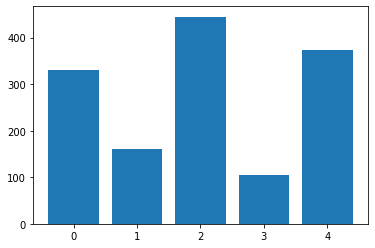

In [49]:
from collections import Counter
from matplotlib import pyplot

# Summarize distribution before any balancing is performed
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print("")
 
# Plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [50]:
# Majority class baseline, score to beat
print("Baseline Accuracy:", clean_df.target.value_counts(normalize=True)[0])

Baseline Accuracy: 0.31448763250883394


In [51]:
# Pre-processing data, stratify with output to ensure imbalanced distribution remains
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(948, 67) (467, 67) (948,) (467,)


In [52]:
# Model accuracy evaluation function, TODO, if at all
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold

# def evaluate_model(X, y, model):
# 	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores

### MODEL 1: basic RFC, no concern for imbalance

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Remember: accuracy is NOT a great measure of classifier performance when the classes are imbalanced 
print('Model Accuracy:', accuracy_score(y_test, y_pred))

Model Accuracy: 0.5674518201284796


In [55]:
# Basic confusion matrix analysis:
  # diagonal represent num (or % if normalized) of times where predicted matches true
  # other values represent mislabeled observations
  # column tells us the predicted label
  # rows tells us the true label

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 44   5  34   1  25]
 [  8   8  24   2  11]
 [ 20   6 108   0  13]
 [  5   1  11  11   6]
 [  9   5  15   1  94]]


In [56]:
# Confusion matrix + seaborn for better readability

def sns_confusion_matrix(y_test, y_pred, title):
  # reshape matrix data to sum of rows, 5x1, ie. normalize
  matrix = confusion_matrix(y_test, y_pred)
  matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

  # built plot
  plt.figure(figsize=(16,7))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size': 10},
              cmap=plt.cm.Greens, linewidths=0.2)

  # add labels
  class_names = ['es', 'other', 'perm', 'temp', 'unknown']
  tick_marks = np.arange(len(class_names)) + 0.5
  plt.xticks(tick_marks, class_names, rotation=25)
  plt.yticks(tick_marks, class_names, rotation=0)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix: {title}')

  plt.show()

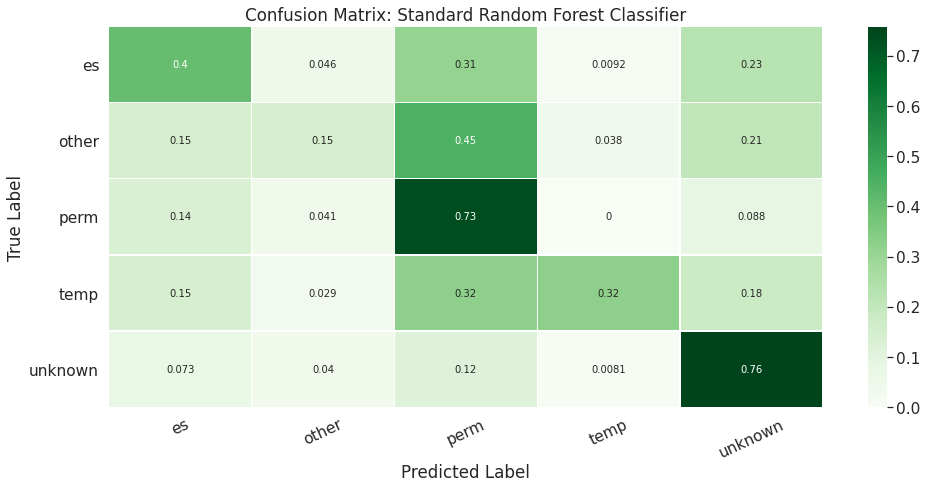

In [57]:
sns_confusion_matrix(y_test, y_pred, "Standard Random Forest Classifier")

 **Confusion matrix results:** 
  * model struggles at predicting other and temp labels
  * some mislabeling of other as perm, temp as perm, plus others

In [58]:
# To gain more insight, try a classfication report
  # Precision: num of correct predictions of a class/total num of predictions of that class (right or wrong)
    # How many are correctly classified among that class?
  # Recall: num of correct predictions/total num of members in that class, actual positives
    # How many of this class you find over the whole number of elements of class?
  # F1 score: depends on precision and recall, high F1 means high of both, low means low of both or imbalance
    # Useful weighted average, good for imbalanced classification...
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.51      0.40      0.45       109
           1       0.32      0.15      0.21        53
           2       0.56      0.73      0.64       147
           3       0.73      0.32      0.45        34
           4       0.63      0.76      0.69       124

    accuracy                           0.57       467
   macro avg       0.55      0.47      0.49       467
weighted avg       0.55      0.57      0.54       467



**Classification matrix results:**
* Model performs well for predicting unknown ed
* Model can detect temp exits accurately but fails to detect many
* Same as above for other
* Seems to perform well for permanent exits (priority?)

### MODEL 2: RFC + built-in default class-weight balancing


In [59]:
# Also known as cost-sensitive learning, via the “class_weight” argument
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))

Model Accuracy: 0.5588865096359743


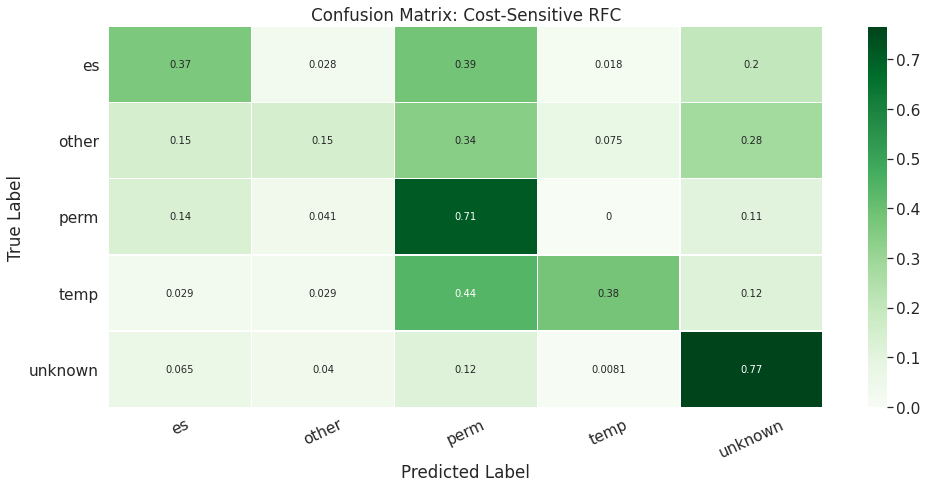

In [60]:
sns_confusion_matrix(y_test, y_pred, "Cost-Sensitive RFC")

In [61]:
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.52      0.37      0.43       109
           1       0.35      0.15      0.21        53
           2       0.54      0.71      0.61       147
           3       0.65      0.38      0.48        34
           4       0.62      0.77      0.69       124

    accuracy                           0.56       467
   macro avg       0.54      0.48      0.48       467
weighted avg       0.54      0.56      0.54       467



### MODEL 3: RFC + custom class-weights

In [62]:
weights = {0:1.0, 1:2.0, 2:1.0, 3:3.0, 4:1.0}
model = RandomForestClassifier(class_weight=weights)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))

Model Accuracy: 0.5738758029978587


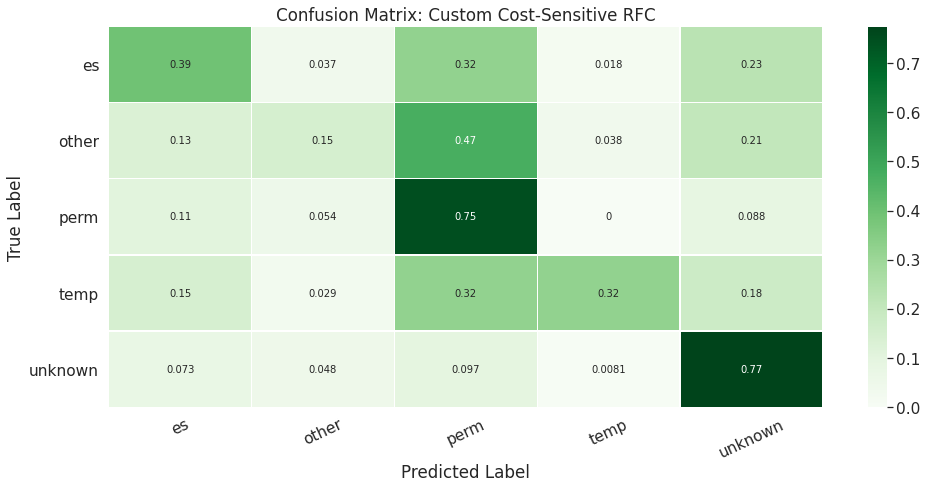

In [63]:
sns_confusion_matrix(y_test, y_pred, "Custom Cost-Sensitive RFC")

In [64]:
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.54      0.39      0.46       109
           1       0.30      0.15      0.20        53
           2       0.57      0.75      0.65       147
           3       0.69      0.32      0.44        34
           4       0.64      0.77      0.70       124

    accuracy                           0.57       467
   macro avg       0.55      0.48      0.49       467
weighted avg       0.56      0.57      0.55       467



### MODEL 4: RFC + SMOTE Oversampling + Undersampling


In [65]:
# The original paper on SMOTE suggests combining SMOTE with random undersampling of the majority class, https://arxiv.org/abs/1106.1813
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
# define pipeline
over = SMOTE()
under = RandomUnderSampler()
model = RandomForestClassifier()
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

In [67]:
# train and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Model Accuracy: 0.5417558886509636


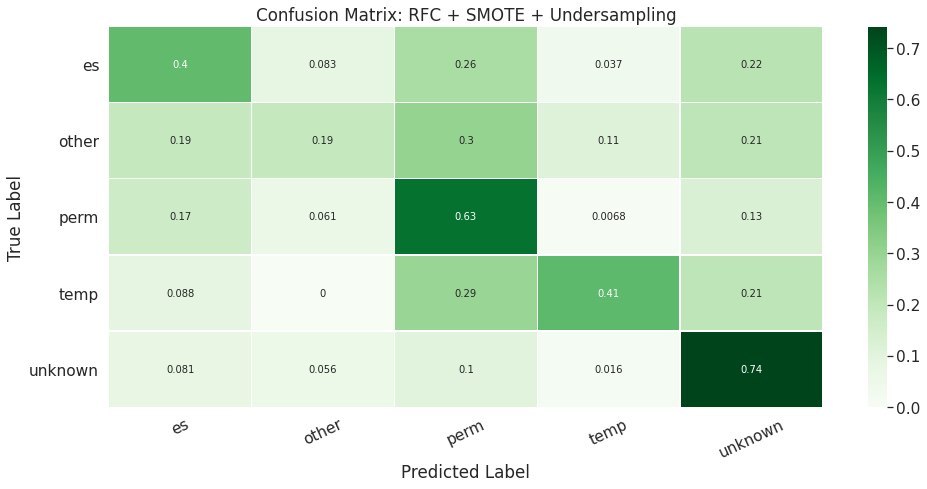

In [68]:
sns_confusion_matrix(y_test, y_pred, "RFC + SMOTE + Undersampling")

In [69]:
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.48      0.40      0.44       109
           1       0.29      0.19      0.23        53
           2       0.58      0.63      0.61       147
           3       0.52      0.41      0.46        34
           4       0.60      0.74      0.66       124

    accuracy                           0.54       467
   macro avg       0.49      0.48      0.48       467
weighted avg       0.52      0.54      0.53       467



**Results**: so far this method spreads out the false predictions the best, but is low on overall accuracy... 

### MODEL 4: Keras Neural Network Sequential Model with Dense Layer

In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.utils import to_categorical

In [71]:
num_class = len(np.unique(y))
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(50, input_dim = input_dim, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(num_class, activation="softmax"))

# Can be optimized for optimers and configs
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Fit the model, consider error of validation split for imbalance
predictor = model.fit([X_train], y=to_categorical(y_train),
                      batch_size=64, epochs=10,
                      verbose=2, validation_split=0.25)

Epoch 1/10
12/12 - 0s - loss: 52.1505 - accuracy: 0.1941 - val_loss: 34.7496 - val_accuracy: 0.2025
Epoch 2/10
12/12 - 0s - loss: 23.1367 - accuracy: 0.2068 - val_loss: 15.4541 - val_accuracy: 0.3038
Epoch 3/10
12/12 - 0s - loss: 10.8898 - accuracy: 0.2968 - val_loss: 11.3240 - val_accuracy: 0.2194
Epoch 4/10
12/12 - 0s - loss: 7.4502 - accuracy: 0.3024 - val_loss: 7.8584 - val_accuracy: 0.3038
Epoch 5/10
12/12 - 0s - loss: 5.4888 - accuracy: 0.3460 - val_loss: 5.7264 - val_accuracy: 0.2743
Epoch 6/10
12/12 - 0s - loss: 4.4198 - accuracy: 0.3629 - val_loss: 5.2762 - val_accuracy: 0.2447
Epoch 7/10
12/12 - 0s - loss: 3.7676 - accuracy: 0.3699 - val_loss: 4.5446 - val_accuracy: 0.2616
Epoch 8/10
12/12 - 0s - loss: 3.2521 - accuracy: 0.3404 - val_loss: 3.9897 - val_accuracy: 0.2743
Epoch 9/10
12/12 - 0s - loss: 3.0094 - accuracy: 0.3488 - val_loss: 3.6424 - val_accuracy: 0.2194
Epoch 10/10
12/12 - 0s - loss: 3.0430 - accuracy: 0.3165 - val_loss: 3.6255 - val_accuracy: 0.2068


### MODEL 5: LightGBM + SMOTE

In [73]:
import lightgbm as lgb

In [74]:
# apply SMOTE resampling
over = SMOTE()
X_rs, y_rs = over.fit_resample(X_train, y_train)

# convert dataset into proper LGB format
d_train=lgb.Dataset(X_rs, label=y_rs)

# basic hyperparameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=5 #no.of unique values in the target class not inclusive of the end value

# train and predict
model = lgb.train(params, d_train, 2000) # epochs
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

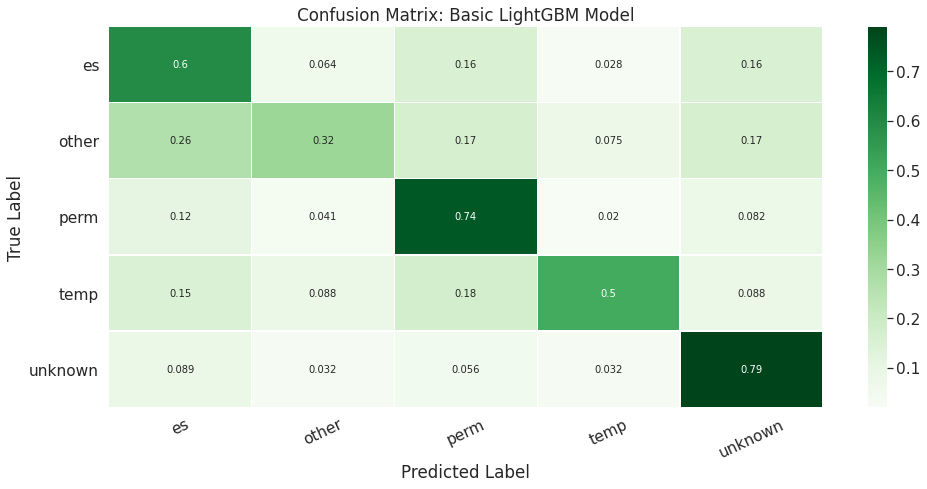



['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       109
           1       0.46      0.32      0.38        53
           2       0.74      0.74      0.74       147
           3       0.55      0.50      0.52        34
           4       0.71      0.79      0.75       124

    accuracy                           0.66       467
   macro avg       0.61      0.59      0.59       467
weighted avg       0.65      0.66      0.65       467



In [75]:
# results
y_pred = [np.argmax(line) for line in y_pred]
sns_confusion_matrix(y_test, y_pred, "Basic LightGBM Model")
print("\n")
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

### MODEL 6: XGBOOST + SMOTE

In [76]:
import xgboost as xgb

In [77]:
# apply SMOTE to entire dataset
over = SMOTE(random_state=42)
X_res, y_res = over.fit_sample(X, y)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state = 42)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [78]:
# define model
model = xgb.XGBClassifier()

# train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))

Model Accuracy: 0.6258503401360545


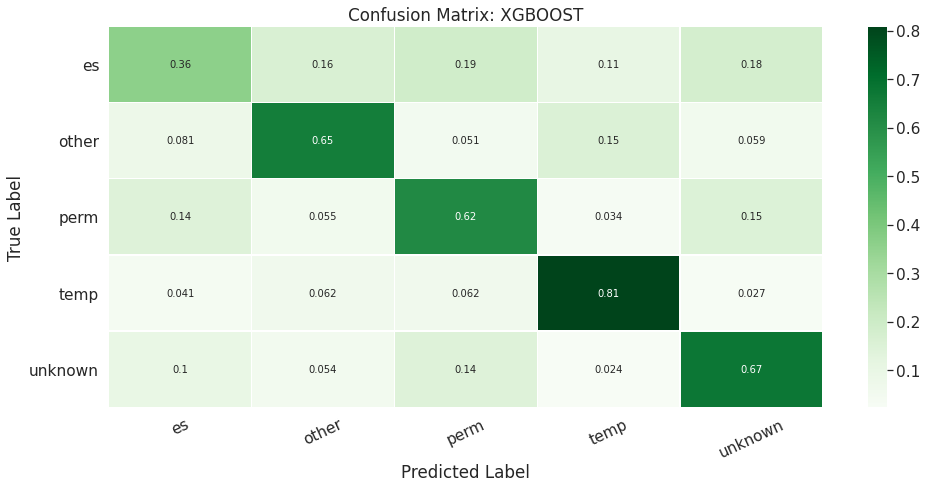



['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.48      0.36      0.41       141
           1       0.64      0.65      0.65       136
           2       0.57      0.62      0.59       146
           3       0.72      0.81      0.76       146
           4       0.65      0.67      0.66       166

    accuracy                           0.63       735
   macro avg       0.62      0.62      0.62       735
weighted avg       0.62      0.63      0.62       735



In [79]:
# results
sns_confusion_matrix(y_test, y_pred, "XGBOOST")
print("\n")
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning

In [80]:
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [81]:
# Split data into input/output
X = clean_df.drop(columns=["target"])
output = clean_df.target

# label encode the target variable
y = LabelEncoder().fit_transform(output)

# apply SMOTE to entire dataset
over = SMOTE(random_state=42)
X_res, y_res = over.fit_sample(X, y)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state = 42)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

### XGBOOST

In [82]:
# ROUND 1, high impact parameters
# define model
model = xgb.XGBClassifier()

# define parameters to test
param_grid = {
 'max_depth':range(3,10,2), # max depth of tree, controls overfitting, default 6
 'min_child_weight':range(1,6,2) # min sum of weights required in a child, controls overfitting, higher = prevents highly specific learning relations of part. sample, default 1
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.7281879194630874)

In [83]:
gsearch.best_score_, gsearch.best_params_

(0.7281879194630874, {'max_depth': 9, 'min_child_weight': 1})

In [84]:
# ROUND 2, micro-tuning of round 1
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1)

# define parameters to test
param_grid = {
 'max_depth':[6,7,8],
 'min_child_weight':[1,2]
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'max_depth': 8, 'min_child_weight': 1}, 0.7268456375838925)

In [85]:
# ROUND 3, tune gamma alone
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1)

# define parameters to test
param_grid = {
'gamma': [i/10.0 for i in range(0,5)] # min loss reduction required to make a node split, higher = more conservative, default 0
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'gamma': 0.3}, 0.7208053691275168)

In [86]:
# ROUND 3, tune sampling
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1)

# define parameters to test
param_grid = {
 'subsample':[i/10.0 for i in range(6,10)], # fraction of observations randomly sampled per tree, lower = conservative, prevents overfitting, too low leads to underfitting, default 1
 'colsample_bytree':[i/10.0 for i in range(6,10)] # fraction of columns to be randomly sampled for each tree, default 1
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.7268456375838925)

In [87]:
# ROUND 4, micro-tuning of above results
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)

# define parameters to test
param_grid = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)] 
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.85}, 0.7214765100671141)

In [88]:
# ROUND 6, tuning regularization parameters
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)

# define parameters to test
param_grid = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100] # L1 regularization term on weight (Lasso reg), default 0
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'reg_alpha': 0.01}, 0.7181208053691275)

In [89]:
# ROUND 7, micro-tuning reg_alpha
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01)

# define parameters to test
param_grid = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'reg_alpha': 0.005}, 0.7268456375838926)

In [90]:
# ROUND 8, TUNING REG_LAMBDA,
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01)

# define parameters to test
param_grid = {
 'reg_lambda':[1, 1.1, 1.2, 1.3] # L2 regularization term on weight, can reduce overfittig, default 1
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'reg_lambda': 1}, 0.7181208053691275)

In [91]:
# ROUND 9, tuning learning rate and trees
# define model
model = xgb.XGBClassifier(max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01)

# define parameters to test
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100,200,500,1000]
}

# define gridsearch
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# train and predict
gsearch.fit(X_train, y_train)

#results
gsearch.best_params_, gsearch.best_score_

({'learning_rate': 0.05, 'n_estimators': 500}, 0.7295302013422817)

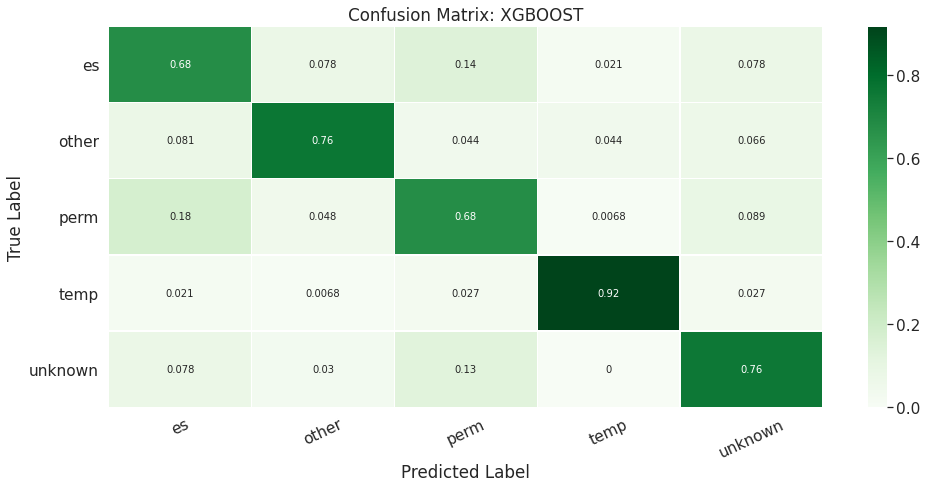



['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       141
           1       0.81      0.76      0.79       136
           2       0.66      0.68      0.67       146
           3       0.93      0.92      0.92       146
           4       0.77      0.76      0.77       166

    accuracy                           0.76       735
   macro avg       0.76      0.76      0.76       735
weighted avg       0.76      0.76      0.76       735



In [92]:
# Final Tuned Model
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=7, 
                          min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01)

# train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print('Model Accuracy:', accuracy_score(y_test, y_pred))

# results
sns_confusion_matrix(y_test, y_pred, "XGBOOST")
print("\n")
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

### LightGBM: Gradient Boosted Decision Trees Method


The LightGBM paper uses XGBoost as a baseline and outperforms it in training speed and the dataset sizes it can handle. In addition, lightgbm uses leaf-wise tree growth algorithm whileXGBoost uses depth-wise tree growth. Leaf-wise method allows the trees to converge faster but the chance of over-fitting increases. Seems like default parameters are better selected, at least for this problem.

**Boosting Methods**:
* gbdt - gradient boosted decision trees, most time consuming, accurate, efficient, stable
* dart - dart gradient boosting, makes use of "dropout," very accurate, complicated settings
* goss - gradient-based one-side sampling, newest and fastest, overfits on small datasets

#### Tuning Rounds

In [93]:
# ROUND 1, tuning amount of leafs
params= {'num_leaves': [15, 31, 63, 127, 255, 511, 1023, 2047]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', n_estimators=100)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'num_leaves': 63}
Best score found by grid search is: 0.72751677852349


In [94]:
# ROUND 2, micro-tuning amount of leafs
params= {'num_leaves': range(28, 38, 1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=31)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'num_leaves': 34}
Best score found by grid search is: 0.7315436241610739


In [95]:
# ROUND 3, tuning minimum data in leaf
params= {'min_data_in_leaf': range(2, 18, 4)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=35)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 2}
Best score found by grid search is: 0.7476510067114094


In [96]:
# ROUND 4, micro-tuning minimum data in leaf
params= {'min_data_in_leaf': range(1, 4, 1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=35,
                           min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 1}
Best score found by grid search is: 0.7496644295302014


In [97]:
# ROUND 5, tuning depth
params= {'max_depth': range(5,30,5)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=35,
                           min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'max_depth': 20}
Best score found by grid search is: 0.7563758389261744


In [98]:
# ROUND 6, micro-tuning depth
params= {'max_depth': range(18,22,1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=35,
                           min_data_in_leaf=2, max_depth=20)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'max_depth': 20}
Best score found by grid search is: 0.7563758389261744


In [99]:
# ROUND 7, tuning depth and leafs together
params= {'max_depth': range(16,24,2),
         'num_leaves': range(32, 40, 2)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=35,
                           min_data_in_leaf=2, max_depth=20)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'max_depth': 18, 'num_leaves': 38}
Best score found by grid search is: 0.7610738255033557


In [100]:
# ROUND 8, tuning min data in leaves after update
params= {'min_data_in_leaf': range(2,12,2)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 2}
Best score found by grid search is: 0.7476510067114094


In [101]:
# ROUND 9, tuning regularization
params= {'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'reg_alpha': 0}
Best score found by grid search is: 0.7476510067114094


In [102]:
# ROUND 10, tuning regularization
params= {'reg_lambda': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'reg_lambda': 0}
Best score found by grid search is: 0.7476510067114094


In [103]:
# ROUND 11, tuning row sampling, bagging_fraction
params = {'bagging_fraction': [0.2, 0.5, 0.7, 1]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'bagging_fraction': 0.2}
Best score found by grid search is: 0.7476510067114094


In [104]:
# ROUND 12, micro-tuning row sampling, bagging_fraction
params = {'bagging_fraction': [0.1, 0.2, 0.3, 0.4]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'bagging_fraction': 0.1}
Best score found by grid search is: 0.7476510067114094


In [105]:
# ROUND 13, tuning % of columns used per iteration, 
params = {'feature_fraction': [0.3, 0.5, 0.7, 1]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'feature_fraction': 1}
Best score found by grid search is: 0.7476510067114094


In [106]:
# ROUND 14, tuning number of estimators
params = {'n_estimators': [100,200,500,1000]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'n_estimators': 500}
Best score found by grid search is: 0.7570469798657717


In [107]:
# ROUND 15, tuning learning rate
# Consider: It is not a good practice to consider the learning rate as a hyperparameter to tune.
params = {'learning_rate': [0.05, 0.1, 0.2, 0.7, 1.2]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'learning_rate': 0.7}
Best score found by grid search is: 0.7583892617449665


In [108]:
# ROUND 16, micro-tuning learning rate
# Consider: It is not a good practice to consider the learning rate as a hyperparameter to tune.
params = {'learning_rate': [0.15, 0.2, 0.25]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='gbdt', 
                           n_estimators=100, num_leaves=36,
                           max_depth=20, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'learning_rate': 0.2}
Best score found by grid search is: 0.7536912751677851


#### Final Model

In [109]:
# Final tuned model
# convert dataset into proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

# basic hyperparameters
params={
    'objective': 'multiclass', 
    'num_class': '5', 
    'metric': 'multi_logloss', 
    'boosting_type': 'gbdt', 
    'n_estimators': 100, 
    'num_leaves': 36,
    'max_depth': 20, 
    'min_data_in_leaf': 2,
    'learning_rate': 0.2
    }

# train and predict
model = lgb.train(params, d_train, 1000) # epochs
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


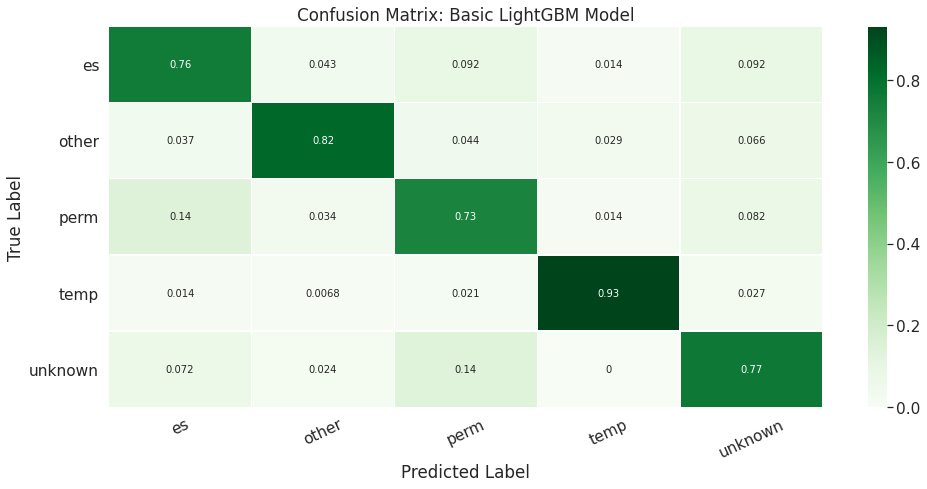



['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       141
           1       0.88      0.82      0.85       136
           2       0.70      0.73      0.71       146
           3       0.94      0.93      0.94       146
           4       0.77      0.77      0.77       166

    accuracy                           0.80       735
   macro avg       0.80      0.80      0.80       735
weighted avg       0.80      0.80      0.80       735



In [110]:
# results
y_pred = [np.argmax(line) for line in y_pred]
sns_confusion_matrix(y_test, y_pred, "Basic LightGBM Model")
print("\n")
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

### LightGBM: Dropout Additive Regression Trees


#### Tuning Rounds

In [111]:
# ROUND 1, tuning amount of leafs
params= {'num_leaves': [15, 31, 63, 127, 255, 511, 1023, 2047]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart')
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'num_leaves': 63}
Best score found by grid search is: 0.710738255033557


In [112]:
# ROUND 2, micro-tuning amount of leafs
params= {'num_leaves': range(50, 70, 2)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=63)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'num_leaves': 50}
Best score found by grid search is: 0.710738255033557


In [113]:
# ROUND 3, micro-tuning amount of leafs
params= {'num_leaves': range(48, 52, 1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=50)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'num_leaves': 48}
Best score found by grid search is: 0.7161073825503356


In [114]:
# ROUND 4, tuning minimum data in leaf
params= {'min_data_in_leaf': range(2, 18, 4)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 2}
Best score found by grid search is: 0.7456375838926175


In [115]:
# ROUND 5, micro-tuning minimum data in leaf
params= {'min_data_in_leaf': range(1, 4, 1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=2)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 3}
Best score found by grid search is: 0.7503355704697986


In [116]:
# ROUND 6, tuning depth
params= {'max_depth': range(5,30,5)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'max_depth': 25}
Best score found by grid search is: 0.7516778523489933


In [117]:
# ROUND 7, micro-tuning depth
params= {'max_depth': range(18,22,1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=20)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'max_depth': 19}
Best score found by grid search is: 0.7496644295302013


In [118]:
# ROUND 8, tuning min data in leaves after update
params= {'min_data_in_leaf': range(2,4,1)}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'min_data_in_leaf': 3}
Best score found by grid search is: 0.7476510067114094


In [119]:
# ROUND 9, tuning regularization
params= {'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'reg_alpha': 0}
Best score found by grid search is: 0.7476510067114094


In [120]:
# ROUND 10, tuning regularization
params= {'reg_lambda': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'reg_lambda': 0.1}
Best score found by grid search is: 0.7543624161073825


In [121]:
# ROUND 11, tuning row sampling, bagging_fraction
params = {'bagging_fraction': [0.2, 0.5, 0.7, 1]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'bagging_fraction': 0.2}
Best score found by grid search is: 0.7476510067114094


In [122]:
# ROUND 12, tuning % of columns used per iteration, 
params = {'feature_fraction': [0.3, 0.5, 0.7, 1]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'feature_fraction': 0.5}
Best score found by grid search is: 0.7483221476510067


In [123]:
# ROUND 13, tuning number of estimators
params = {'n_estimators': [100,200,500,1000]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'n_estimators': 1000}
Best score found by grid search is: 0.7630872483221476


In [124]:
# ROUND 14, tuning learning rate
# Consider: It is not a good practice to consider the learning rate as a hyperparameter to tune.
params = {'learning_rate': [0.05, 0.1, 0.2, 0.7, 1.2]}

model = lgb.LGBMClassifier(objective='multiclass', num_class='5', 
                           metric='multi_logloss', boosting_type='dart', 
                           num_leaves=49, min_data_in_leaf=3,
                           max_depth=21, n_estimators=1000)
gsearch = GridSearchCV(estimator=model, param_grid=params, cv=5)
gsearch.fit(X_train, y_train)

print('Best parameters found by grid search are:', gsearch.best_params_)
print('Best score found by grid search is:', gsearch.best_score_)

Best parameters found by grid search are: {'learning_rate': 0.1}
Best score found by grid search is: 0.7630872483221476


#### Final Model


In [125]:
# Final tuned model
# convert dataset into proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

# basic hyperparameters
params={
    'objective': 'multiclass', 
    'num_class': '5', 
    'metric': 'multi_logloss', 
    'boosting_type': 'dart', 
    'n_estimators': 1000, 
    'num_leaves': 349,
    'max_depth': 21, 
    'min_data_in_leaf': 3,
    'learning_rate': 0.1
    }

# train and predict
model = lgb.train(params, d_train, 1000) # epochs
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


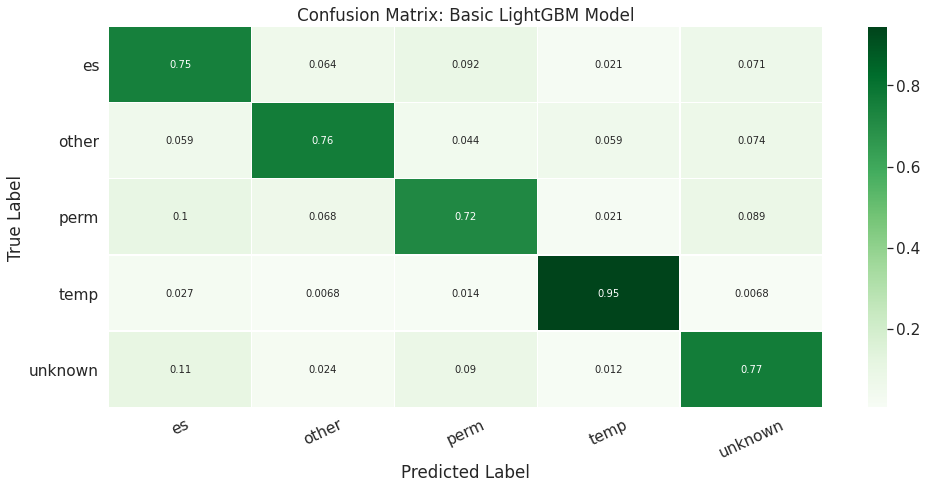



['es', 'other', 'perm', 'temp', 'unknown'] 

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       141
           1       0.81      0.76      0.79       136
           2       0.74      0.72      0.73       146
           3       0.90      0.95      0.92       146
           4       0.79      0.77      0.78       166

    accuracy                           0.79       735
   macro avg       0.79      0.79      0.79       735
weighted avg       0.79      0.79      0.79       735



In [126]:
# results
y_pred = [np.argmax(line) for line in y_pred]
sns_confusion_matrix(y_test, y_pred, "Basic LightGBM Model")
print("\n")
print(['es', 'other', 'perm', 'temp', 'unknown'], "\n")
print(classification_report(y_test, y_pred))

# Final Model

In [127]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [128]:
# Confusion matrix + seaborn for better readability
def sns_confusion_matrix(y_test, y_pred, title):
  # reshape matrix data to sum of rows, 5x1, ie. normalize
  matrix = confusion_matrix(y_test, y_pred)
  matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

  # build plot
  plt.figure(figsize=(16,7))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size': 10},
              cmap=plt.cm.Greens, linewidths=0.2)

  # add labels
  class_names = ['es', 'other', 'perm', 'temp', 'unknown']
  tick_marks = np.arange(len(class_names)) + 0.5
  plt.xticks(tick_marks, class_names, rotation=25)
  plt.yticks(tick_marks, class_names, rotation=0)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix: {title}')

  plt.show()

In [129]:
# Split data into input/output
X = clean_df.drop(columns=["target"])
output = clean_df.target

# label encode the target variable
y = LabelEncoder().fit_transform(output)

# apply SMOTE to entire dataset
over = SMOTE(random_state=42)
X_res, y_res = over.fit_sample(X, y)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state = 42)

# convert dataset into proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

# basic hyperparameters
params={
    'objective': 'multiclass', 
    'num_class': '5', 
    'metric': 'multi_logloss', 
    'boosting_type': 'gbdt', 
    'n_estimators': 100, 
    'num_leaves': 36,
    'max_depth': 20, 
    'min_data_in_leaf': 2,
    'learning_rate': 0.2
    }

# train
model = lgb.train(params, d_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

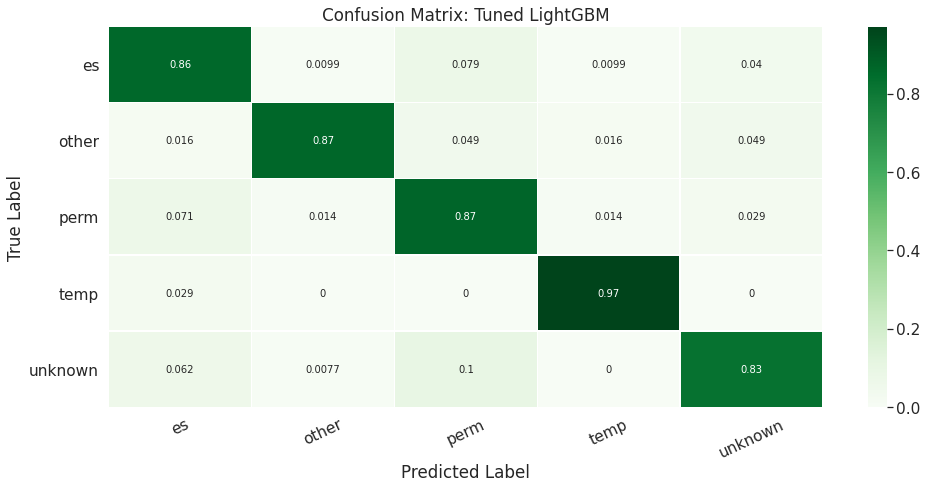


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       101
           1       0.93      0.87      0.90        61
           2       0.84      0.87      0.85       140
           3       0.89      0.97      0.93        35
           4       0.91      0.83      0.87       130

    accuracy                           0.87       467
   macro avg       0.88      0.88      0.88       467
weighted avg       0.87      0.87      0.87       467


 [0, 1, 2, 3, 4] == ['es', 'other', 'perm', 'temp', 'unknown'] 



In [130]:
# split into train/test without balancing (raw)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# predict
y_pred = model.predict(X_test)

# results
y_pred = [np.argmax(line) for line in y_pred]
sns_confusion_matrix(y_test, y_pred, "Tuned LightGBM")
print("")
print(classification_report(y_test, y_pred))
print("\n", [0,1,2,3,4], "==", ['es', 'other', 'perm', 'temp', 'unknown'], "\n")

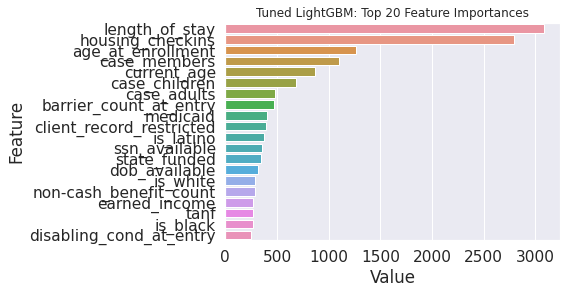

In [131]:
# visualizing feature importances
feature_importances = pd.DataFrame(sorted(zip(model.feature_importance(), X.columns)), columns=['Value', 'Feature'])

data = feature_importances.sort_values(by="Value", ascending=False).head(20)
sns.barplot(x="Value", y="Feature", data=data)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Tuned LightGBM: Top 20 Feature Importances")
plt.show()

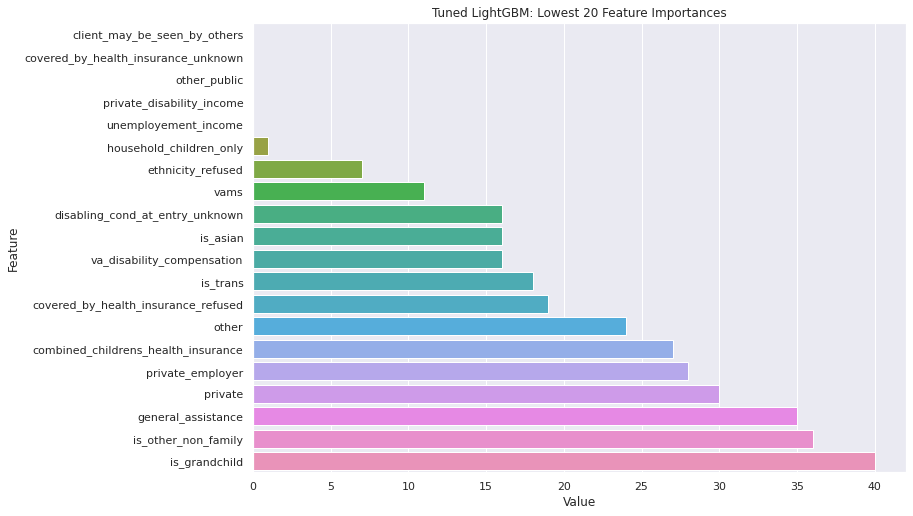

In [132]:
data = feature_importances.sort_values(by="Value", ascending=True).head(20)
sns.barplot(x="Value", y="Feature", data=data)
plt.title("Tuned LightGBM: Lowest 20 Feature Importances")
plt.show()

In [133]:
import pickle

In [134]:
print('Dumping and loading model with pickle...')
# dump model with pickle
with open('model.pkl', 'wb') as fout:
    pickle.dump(model, fout)

Dumping and loading model with pickle...


In [135]:
# load model with pickle to predict
with open('model.pkl', 'rb') as fin:
    pkl_bst = pickle.load(fin)
# can predict with any iteration when loaded in pickle way
y_pred = pkl_bst.predict(X_test, num_iteration=7)

# TODO: 
* play around with removing more features? maybe
* visualize feature importances using SHAP